# 機械学習とは？

<center>
明示的に program しなくても（都度教えなくても）, PCが自ら学ぶ（学習する）事ができるようにする為にはどうすれば良いのかを考える分野
<center>
    ↓
<b><center>
コンピュータが自ら学ぶ
</center></b>
    ↓
<center>
データが増えていく事によって最適な解が変わっていく
</center>

#### <u>T　:　タスクT</u>
- *何かしらの判断をしてくれる　program*
    - 例） 健康かどうかを判定する仕組み自体
        - **model, アルゴリズム, 数式**

<u>E　:　経験E</u>
- *ある人が健康かどうかを示す data*
    - 例) 血圧・血糖値・体重 etc...
        - **数値**
    
#### <u>P　:　正答率P</u>
- *健康かどうかを正しく判断した場合の割合*


    
<center>
問題・課題
<center>
    ↓
<center>
人間が自ら考えて行動
<center>
    ↓
<center>
　色々な経験・体感の積み重ね
<center>
    ↓
<center>
結果を受け状況に応じて改善　or　現状維持(現状はbest practice)
<center>
    ↓
<center>
問題解決能力・意思決定能力
<center>
    ||
<b><center>
より良いモノ・価値・人生を生み出す為の努力の過程
<center></b>

# 単回帰分析

<center>
1. インプット data の整理
<center>
    ↓
<center>
2. アウトプット data の整理
<center>
    ↓
<center>
3. 分析方法（ model ）について考える
<center>

## Algorithm 作成

#### <u>ビールの売れ行き予測</u>
- *入力データの整理*

|気温|売上|
|:---:|:---:|
|20℃|30本|
|23℃|32本|
|28℃|40本|
|30℃|44本|


#### $$
(　20,　30　),　(　23,　32　),　(　28,　40　),　(　30,　44　)
$$

## <u>誤差関数の導出</u>

### 1. *誤差の導出*

$$
\hat{y}=\omega_0+\omega_1x　　　(x_1, y_1)　　　\hat{y}=\omega_0+\omega_1x-y_1
$$


### 2. *誤差関数の導出*
- $x_1, y_1=　(20, 30), (23, 32), (28, 40), (30, 44)$

$$
(\hat{y}-y)^2　=　(\omega_0+\omega_1x_1-y_1)^2　
$$

$$
=　\omega_0^2　+　\omega_1^2x_1^2　+　y_1^2　+　2\omega_0\omega_1x_1　-　2\omega_0\omega_1x_1y_1　-　2\omega_0y_1
$$


### 3. *導入関数の導出*
- $x_1, y_1=　(20, 30), (23, 32), (28, 40), (30, 44)$

    - 1. 初期重み　$(\omega_0, \omega_1 )$ における傾きを計算

$$
\frac{\partial f}{\partial \omega_0}　=　2\omega0　+　2\omega1x1　-　2y1
$$

$$
\frac{\partial f}{\partial \omega_1}　=　2\omega_1x_1^2　+　2\omega_0x_1　-　2x_1y_1
$$

$$
=　x1( 2\omega_1x_1　+　2\omega_0　-　2y_1 )
$$


- 2. 傾きの方向に動かす

$$
\omega_0　:=　\omega_0　-　\alpha(2\omega_0　+　2\omega_1x_1　-　2y_1)
$$

$$
\omega_1　:=　\omega_1　-　\alpha(x1(2\omega_1x_1　+　2\omega_0　-　2y_1))
$$

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib        # グラフ日本語対応
%matplotlib inline

ModuleNotFoundError: No module named 'japanize_matplotlib'

In [9]:
input_data = np.array([[20, 30], [23, 32], [28, 40], [30, 44]])
data_num = input_data.shape[0]

### **誤差関数の導出**
- $x_1, y_1=　(20, 30), (23, 32), (28, 40), (30, 44)$

- *$\omega$　=　重み*

- **傾きを求める為の基の式**


$$
(\hat{y}-y)^2　=　(\omega_0+\omega_1x_1-y_1)^2　
$$

$$
(\omega_0+\omega_1x_1-y_1)^2　=　\omega_0^2　+　\omega_1^2x_1^2　+　y_1^2　+　2\omega_0\omega_1x_1　-　2\omega_0\omega_1x_1y_1　-　2\omega_0y_1
$$


In [11]:
epochs = 100                   # (最急降下法に基づいて)そのセットを何回やるか : epochs
alpha = 0.0005                 # 傾き方向にどれくらい動かすかの程度を示す : 標準化してないので

# 重みの設定 : 一般的には random.randn などの関数を使用する/今回は理解の為自身で設定
w0 = 0.1
w1 = 0.1

# 1.  1回毎に 傾き x α分だけ W0方向 W１方向 に少しだけずらす。(最急降下法に基づいて)指定されたセットをやる
for t in range(epochs):
    
    # 傾きの初期化(定義づけ)
    dw0 = 0
    dw1 = 0
    
    # 2. 誤差関数を微分
    for i in range(data_num):
        dw0 = dw0 + 2*w0 + 2*w1*input_data[i, 0] - 2*input_data[i, 1]      # w0の傾き
        dw1 = dw1 + input_data[i, 0]*(2*w1*input_data[i, 0] + 2*w0 - 2*input_data[i, 1])  # w1方向の傾き

    # 3. 最急降下法で重みの更新
    w0 = w0 - alpha*(dw0)
    w1 = w1 - alpha*(dw1)
    


*1. epochs で指定した数だけ　for文の一連の code が実行される*

*2. data　の数分だけ、足し算がされて　=　残差の２乗　+　誤差関数の偏微分の値　=　w0,　w1　の傾きを表す*

*3. 傾きに　$\alpha$*　を掛けた分だけ　$\omega$(重み)　の位置を少しずらす

*4. 上記を epochs の数だけ繰り返す*

- <u>dw0, dw1　=　傾きは　1回1回 0 にするためにfor分の中で初期化の定義している</u>

- **更新後の傾きがどんどん足されてしまうので、1回1回　0 にしてクリアにして計算する事で正しい値が取得できる**

### 正しい回帰ができているのか?
- plot してみる

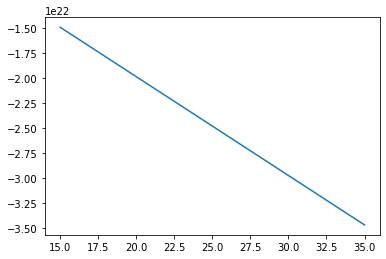

In [23]:
# w0 w1 の値を plot

# x軸, y軸を決める　：　　x軸に対応してy軸が plot されていく
x = np.linspace(15, 35, 100)
y = w0 + w1*x

plt.plot(x, y)

- 間違っている...

- 気温が上がれば、ビールの本数が増える前提なので右肩上がりになるはず